In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


### Load the data

In [2]:
data = pd.read_csv("../input/eergy-efficiency-dataset/ENB2012_data.csv")

In [3]:
data.columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height",
               "Orientation", "Glazing Area", "Glazing Area Distribution", "Heating Load", 
                "Cooling Load"]

In [4]:
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Data type

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Data Preprocessing

In [6]:
# Check missing values
data.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [7]:
data.shape

(768, 10)

In [8]:
# Summary statistics
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Data Exploration

**Relative Compactness**

In [9]:
data['Relative Compactness'].unique().size

12

<AxesSubplot:xlabel='Relative Compactness'>

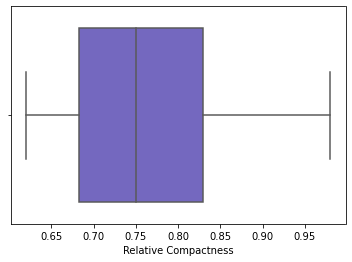

In [10]:
sns.boxplot(x = data['Relative Compactness'], color = "slateblue")

<function matplotlib.pyplot.show(close=None, block=None)>

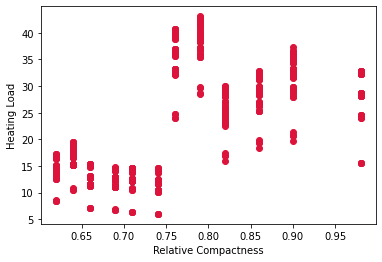

In [11]:
## sebaran data berdasarkan atribut heating load pada Relative Compactness
x = data['Relative Compactness']
y = data['Heating Load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('Relative Compactness')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

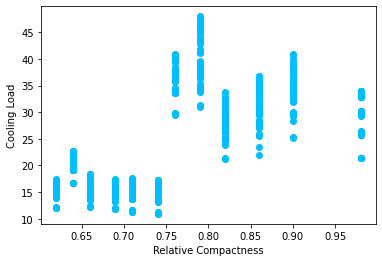

In [12]:
## sebaran data berdasarkan atribut cooling load pada Relative Compactness
x = data['Relative Compactness']
y = data['Cooling Load']
plt.scatter(x, y, color = "deepskyblue")
plt.xlabel('Relative Compactness')
plt.ylabel('Cooling Load')
plt.show

**Surface Area**

In [13]:
data['Surface Area'].unique().size

12

<AxesSubplot:xlabel='Surface Area'>

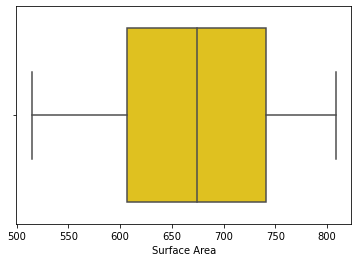

In [14]:
sns.boxplot(x = data['Surface Area'], color = "gold")

<function matplotlib.pyplot.show(close=None, block=None)>

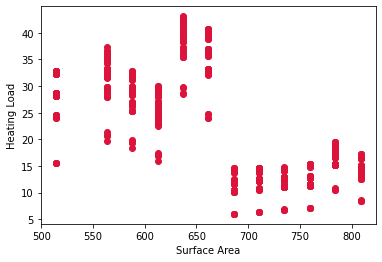

In [15]:
## sebaran data berdasarkan atribut heating load pada Surface Area
x = data['Surface Area']
y = data['Heating Load']
plt.scatter(x, y, color ="crimson")
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

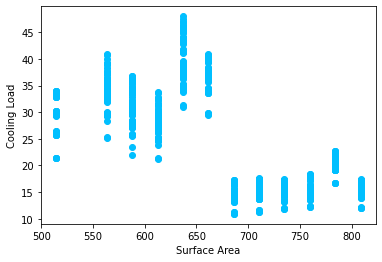

In [16]:
## sebaran data berdasarkan atribut cooling load pada Surface Area
x = data['Surface Area']
y = data['Cooling Load']
plt.scatter(x, y, color ="deepskyblue")
plt.xlabel('Surface Area')
plt.ylabel('Cooling Load')
plt.show

**Wall Area**

In [17]:
data['Wall Area'].unique().size

7

<AxesSubplot:xlabel='Surface Area'>

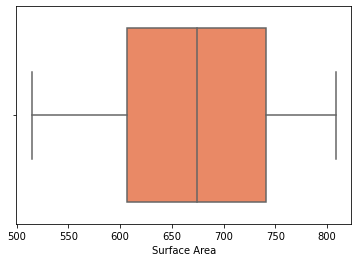

In [18]:
sns.boxplot(x = data['Surface Area'], color = "coral")

<function matplotlib.pyplot.show(close=None, block=None)>

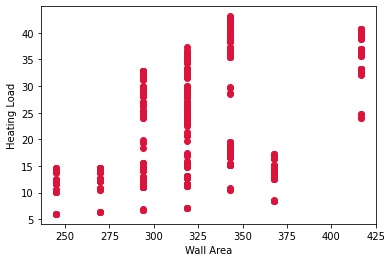

In [19]:
## sebaran data berdasarkan atribut heating load pada Wall Area
x = data['Wall Area']
y = data['Heating Load']
plt.scatter(x, y, color ="crimson")
plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

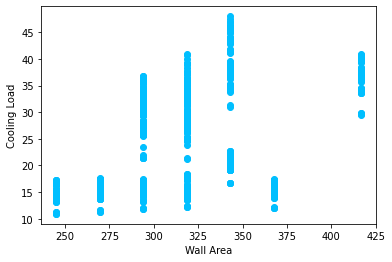

In [20]:
## sebaran data berdasarkan atribut cooling load pada Wall Area
x = data['Wall Area']
y = data['Cooling Load']
plt.scatter(x, y, color ="deepskyblue")
plt.xlabel('Wall Area')
plt.ylabel('Cooling Load')
plt.show

**Roof Area**

In [21]:
data['Roof Area'].unique().size

4

<AxesSubplot:xlabel='Roof Area'>

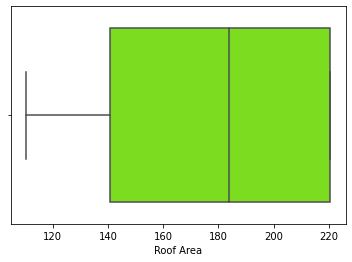

In [22]:
sns.boxplot(x = data['Roof Area'], color = "lawngreen")

<function matplotlib.pyplot.show(close=None, block=None)>

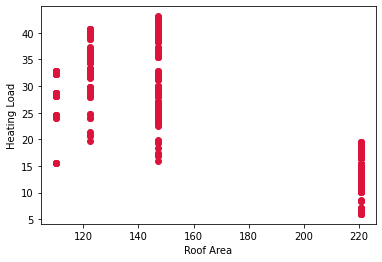

In [23]:
## sebaran data berdasarkan atribut heating load pada Roof Area
x = data['Roof Area']
y = data['Heating Load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('Roof Area')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

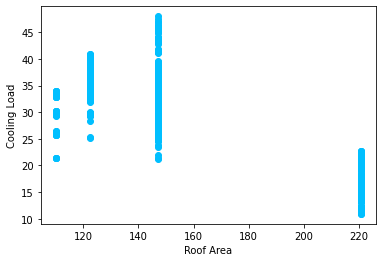

In [24]:
## sebaran data berdasarkan atribut cooling load pada Roof Area
x = data['Roof Area']
y = data['Cooling Load']
plt.scatter(x, y, color = "deepskyblue")
plt.xlabel('Roof Area')
plt.ylabel('Cooling Load')
plt.show

**Overall Height**

In [25]:
data['Overall Height'].unique().size

2

<AxesSubplot:xlabel='Overall Height'>

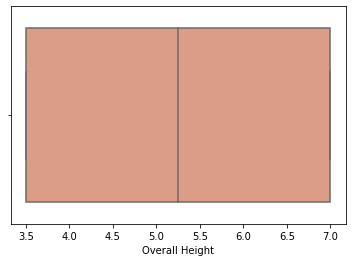

In [26]:
sns.boxplot(x = data['Overall Height'], color = "darksalmon")

<function matplotlib.pyplot.show(close=None, block=None)>

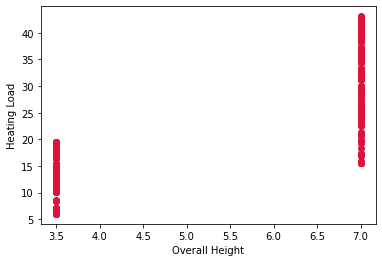

In [27]:
## sebaran data berdasarkan atribut heating load pada Overall Height
x = data['Overall Height']
y = data['Heating Load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('Overall Height')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

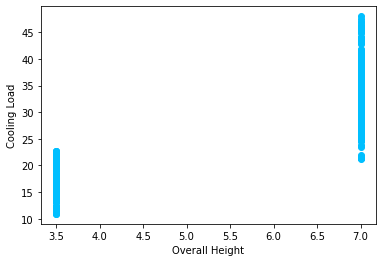

In [28]:
## sebaran data berdasarkan atribut cooling load pada Overall Height
x = data['Overall Height']
y = data['Cooling Load']
plt.scatter(x, y, color = "deepskyblue")
plt.xlabel('Overall Height')
plt.ylabel('Cooling Load')
plt.show

**Orientation**

In [29]:
data['Orientation'].unique().size

4

<AxesSubplot:xlabel='Orientation'>

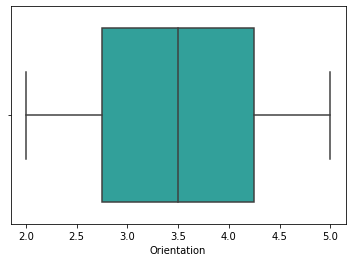

In [30]:
sns.boxplot(x = data['Orientation'], color = "lightseagreen")

<function matplotlib.pyplot.show(close=None, block=None)>

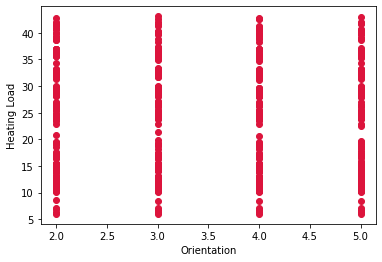

In [31]:
## sebaran data berdasarkan atribut heating load pada Orientation
x = data['Orientation']
y = data['Heating Load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('Orientation')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

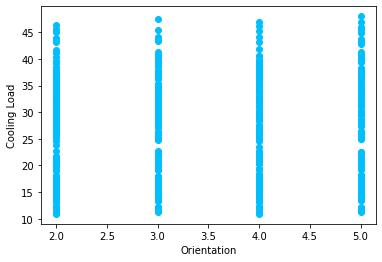

In [32]:
## sebaran data berdasarkan atribut cooling load pada Orientation
x = data['Orientation']
y = data['Cooling Load']
plt.scatter(x, y, color = "deepskyblue")
plt.xlabel('Orientation')
plt.ylabel('Cooling Load')
plt.show

**Glazing Area**

In [33]:
data['Glazing Area'].unique().size

4

<AxesSubplot:xlabel='Glazing Area'>

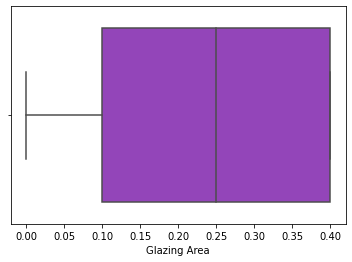

In [34]:
sns.boxplot(x = data['Glazing Area'], color = "darkorchid")

<function matplotlib.pyplot.show(close=None, block=None)>

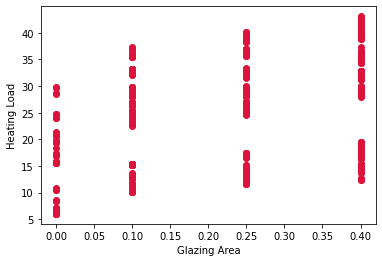

In [35]:
## sebaran data berdasarkan atribut heating load pada Glazing Area
x = data['Glazing Area']
y = data['Heating Load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('Glazing Area')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

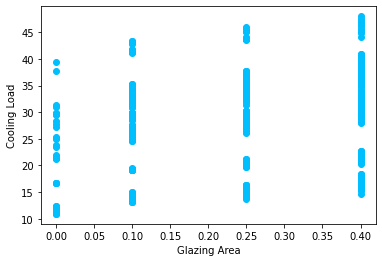

In [36]:
## sebaran data berdasarkan atribut cooling load pada Glazing Area
x = data['Glazing Area']
y = data['Cooling Load']
plt.scatter(x, y, color = "deepskyblue")
plt.xlabel('Glazing Area')
plt.ylabel('Cooling Load')
plt.show

**Glazing Area Distribution**

In [37]:
data['Glazing Area Distribution'].unique().size

6

<AxesSubplot:xlabel='Glazing Area Distribution'>

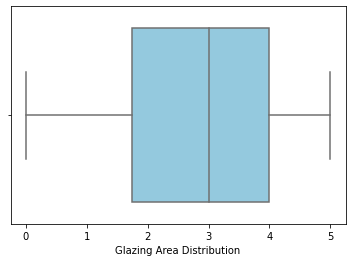

In [38]:
sns.boxplot(x = data['Glazing Area Distribution'], color = "skyblue")

<function matplotlib.pyplot.show(close=None, block=None)>

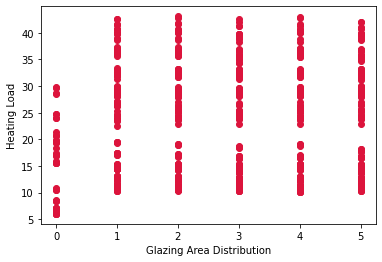

In [39]:
## sebaran data berdasarkan atribut heating load pada Glazing Area Distribution
x = data['Glazing Area Distribution']
y = data['Heating Load']
plt.scatter(x, y, color = "crimson")
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Heating Load')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

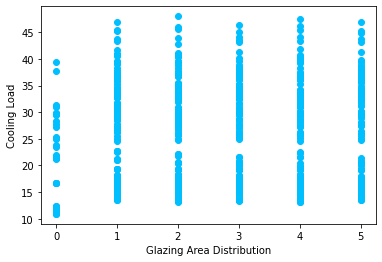

In [40]:
## sebaran data berdasarkan atribut cooling load pada Glazing Area Distribution
x = data['Glazing Area Distribution']
y = data['Cooling Load']
plt.scatter(x, y, color = "deepskyblue")
plt.xlabel('Glazing Area Distribution')
plt.ylabel('Cooling Load')
plt.show

**Heating Load**

In [41]:
data['Heating Load'].unique().size

586

<AxesSubplot:xlabel='Heating Load'>

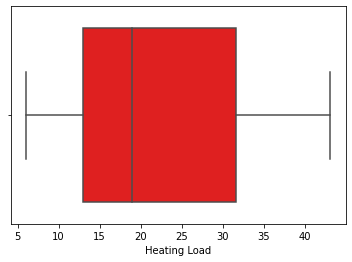

In [42]:
sns.boxplot(x = data['Heating Load'], color = "r")

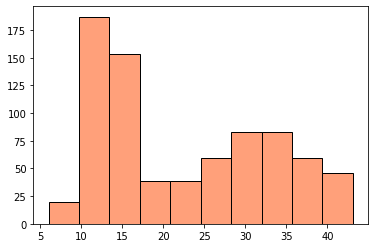

In [43]:
plt.hist(data['Heating Load'], bins = 10, edgecolor = 'black', color = "lightsalmon")
plt.show()

**Cooling Load**

In [44]:
data['Cooling Load'].unique().size

636

<AxesSubplot:xlabel='Cooling Load'>

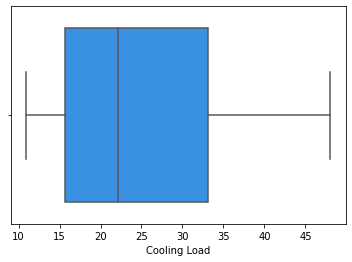

In [45]:
sns.boxplot(x = data['Cooling Load'], color = "dodgerblue")

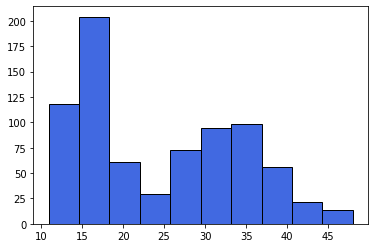

In [46]:
plt.hist(data['Cooling Load'], bins = 10, edgecolor = 'black', color = "royalblue")
plt.show()

## Visualisasi heating dan cooling load

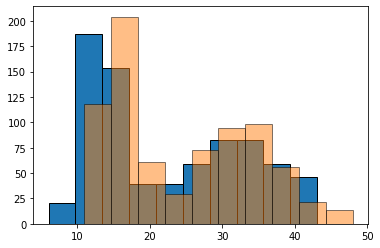

In [47]:
plt.hist(data['Heating Load'], bins = 10, edgecolor = 'black')
plt.hist(data['Cooling Load'], bins = 10, edgecolor = 'black', alpha = 0.5)
plt.show()

## Correlations

<AxesSubplot:>

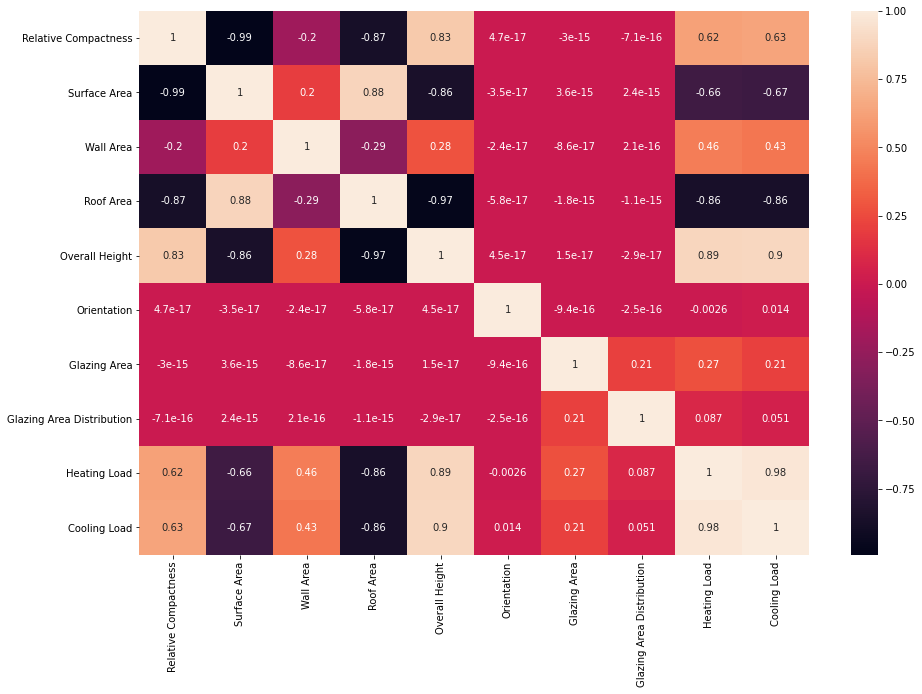

In [48]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot = True)

Kesimpulan sementara :
* Tidak terdapat missing value
* Tidak terdapat outliers

* X1 berbanding terbalik dgn X2. Nilai korelasi -0.99 (korelasi negatif)
* X2 berbanding lurus dgn X3. Nilai korelasi 0.2 (korelasi rendah, positif
* X2 berbanding lurus dgn X4. Nilai korelas 0.88 (korelasi positif)
* X3 berbanding terbalik dgn X4. Nilai korelasi -0.29 (korelasi rendah, negatif)
* X4 berbanding terbalik dgn X5. Nilai korelasi -0.97 (korelasi negatif)
* X7 berbanding lurus dgn X8. Nilai korelasi 0.21 (korelasi rendah, positif)
* Y1 berbanding terbalik dgn X4. Nilai korelasi -0.86 (korelasi negatif)
* Y1 berbanding lurus dgn X5. Nilai korelasi 0.89 (korelasi positif)
* Y2 berbanding terbalik dgn X4. Nilai korelasi -0.86 (korelasi negatif)
* Y2 berbanding terbalik dgn X5. Nilai korelasi 0.9 (korelasi positif)

## Visualisasi atribut yang berkaitan

**Relative Compactness vs Surface Area**

<function matplotlib.pyplot.show(close=None, block=None)>

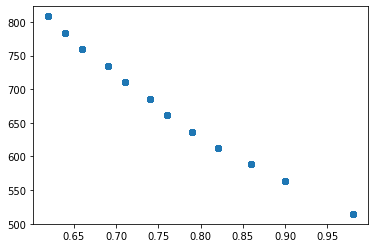

In [49]:
x = data['Relative Compactness']
y = data['Surface Area']
plt.scatter(x,y)
plt.show

In [50]:
x = data['Relative Compactness'].values.reshape(-1,1)
y = data['Surface Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-821.03290536]]
[1299.05718485]


In [52]:
# accuracy score

lin_reg.score(x_test, y_test)

0.9839038348855009

Text(0.5, 1.0, 'Relative Compactness vs Surface Area')

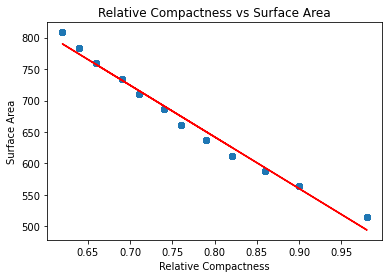

In [53]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Relative Compactness')
plt.ylabel('Surface Area')
plt.title('Relative Compactness vs Surface Area')

**Relative Compactness vs Roof Area**

<function matplotlib.pyplot.show(close=None, block=None)>

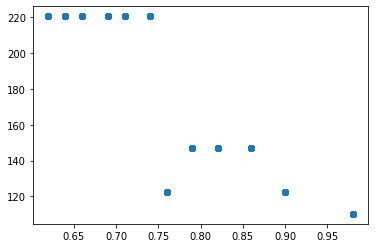

In [54]:
x = data['Relative Compactness']
y = data['Roof Area']
plt.scatter(x,y)
plt.show

In [55]:
x = data['Relative Compactness'].values.reshape(-1,1)
y = data['Roof Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [56]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-370.98376157]]
[460.42876309]


In [57]:
# accuracy score

lin_reg.score(x_test, y_test)

0.7905010582551406

Text(0.5, 1.0, 'Relative Compactness vs Roof Area')

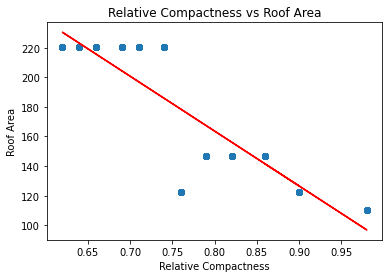

In [58]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Relative Compactness')
plt.ylabel('Roof Area')
plt.title('Relative Compactness vs Roof Area')

**Relative Compactness vs Wall Area**

<function matplotlib.pyplot.show(close=None, block=None)>

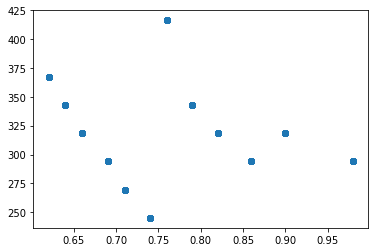

In [59]:
x = data['Relative Compactness']
y = data['Wall Area']
plt.scatter(x,y)
plt.show

In [60]:
x = data['Relative Compactness'].values.reshape(-1,1)
y = data['Wall Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [61]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-85.45106433]]
[385.19149162]


In [62]:
# accuracy score

lin_reg.score(x_test, y_test)

0.012317181800426735

Text(0.5, 1.0, 'Relative Compactness vs Wall Area')

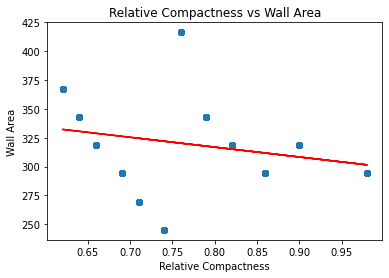

In [63]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Relative Compactness')
plt.ylabel('Wall Area')
plt.title('Relative Compactness vs Wall Area')

**Relative Compactness vs Overall Height**

<function matplotlib.pyplot.show(close=None, block=None)>

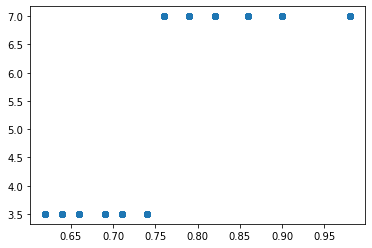

In [64]:
x = data['Relative Compactness']
y = data['Overall Height']
plt.scatter(x,y)
plt.show

In [65]:
x = data['Relative Compactness'].values.reshape(-1,1)
y = data['Overall Height'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[13.80850172]]
[-5.31593576]


In [67]:
# accuracy score

lin_reg.score(x_test, y_test)

0.6326702221552941

Text(0.5, 1.0, 'Relative Compactness vs Overall Height')

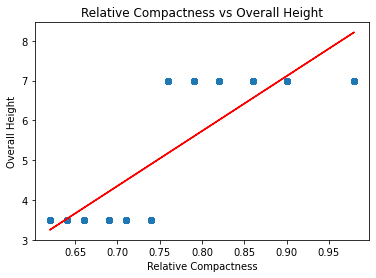

In [68]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Relative Compactness')
plt.ylabel('Overall Height')
plt.title('Relative Compactness vs Overall Height')

**Surface Area vs Wall Area**

<function matplotlib.pyplot.show(close=None, block=None)>

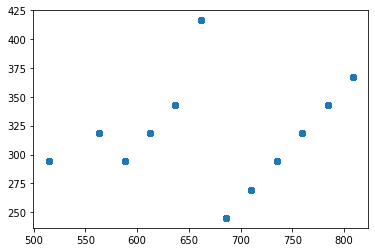

In [69]:
x = data['Surface Area']
y = data['Wall Area']
plt.scatter(x,y)
plt.show

In [70]:
x = data['Surface Area'].values.reshape(-1,1)
y = data['Wall Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [71]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.09386367]]
[255.6200631]


In [72]:
# accuracy score

lin_reg.score(x_test, y_test)

0.04606936272590256

Text(0.5, 1.0, 'Surface Area vs Wall Area')

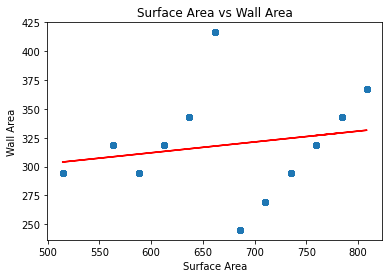

In [73]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Surface Area')
plt.ylabel('Wall Area')
plt.title('Surface Area vs Wall Area')

**Surface Area vs Roof Area**

<function matplotlib.pyplot.show(close=None, block=None)>

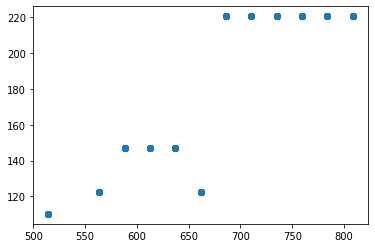

In [74]:
x = data['Surface Area']
y = data['Roof Area']
plt.scatter(x,y)
plt.show

In [75]:
x = data['Surface Area'].values.reshape(-1,1)
y = data['Roof Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [76]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.4505452]]
[-126.06861685]


In [77]:
# accuracy score

lin_reg.score(x_test, y_test)

0.7717680347364178

Text(0.5, 1.0, 'Surface Area vs Roof Area')

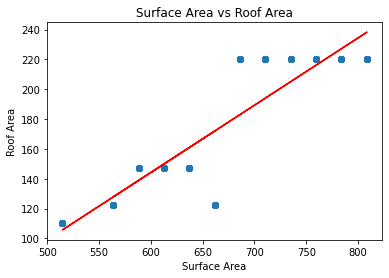

In [78]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Surface Area')
plt.ylabel('Roof Area')
plt.title('Surface Area vs Roof Area')

**Surface Area vs Overall Height**

<function matplotlib.pyplot.show(close=None, block=None)>

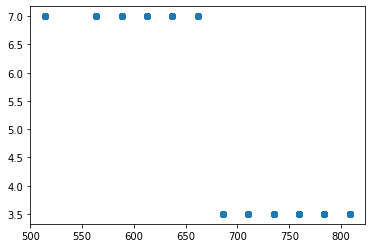

In [79]:
x = data['Surface Area']
y = data['Overall Height']
plt.scatter(x,y)
plt.show

In [80]:
x = data['Surface Area'].values.reshape(-1,1)
y = data['Overall Height'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [81]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-0.01713675]]
[16.76444337]


In [82]:
# accuracy score

lin_reg.score(x_test, y_test)

0.7230677534401755

Text(0.5, 1.0, 'Surface Area vs Overall Height')

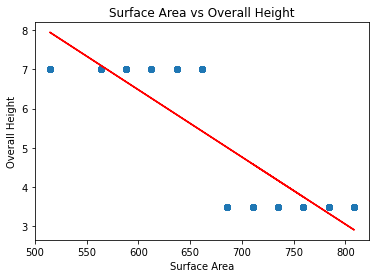

In [83]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Surface Area')
plt.ylabel('Overall Height')
plt.title('Surface Area vs Overall Height')

**Wall Area vs Roof Area**

<function matplotlib.pyplot.show(close=None, block=None)>

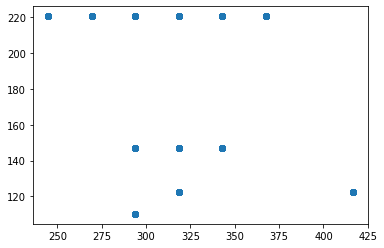

In [84]:
x = data['Wall Area']
y = data['Roof Area']
plt.scatter(x,y)
plt.show

In [85]:
x = data['Wall Area'].values.reshape(-1,1)
y = data['Roof Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [86]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-0.29012618]]
[269.4523435]


In [87]:
# accuracy score

lin_reg.score(x_test, y_test)

0.1139930009040242

Text(0.5, 1.0, 'Wall Area vs Roof Area')

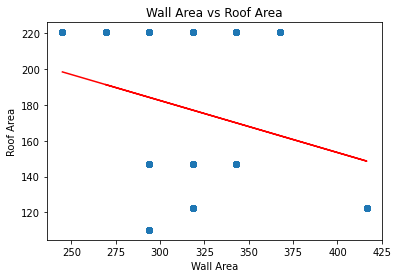

In [88]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Wall Area')
plt.ylabel('Roof Area')
plt.title('Wall Area vs Roof Area')

**Wall Area vs Overall Height**

<function matplotlib.pyplot.show(close=None, block=None)>

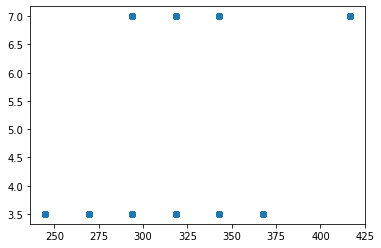

In [89]:
x = data['Wall Area']
y = data['Overall Height']
plt.scatter(x,y)
plt.show

In [90]:
x = data['Wall Area'].values.reshape(-1,1)
y = data['Overall Height'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [91]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.0114555]]
[1.57792246]


In [92]:
# accuracy score

lin_reg.score(x_test, y_test)

0.05959609916512476

Text(0.5, 1.0, 'Wall Area vs Overall Height')

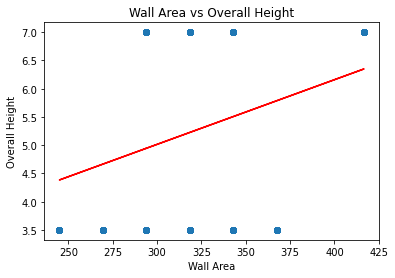

In [93]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Wall Area')
plt.ylabel('Overall Height')
plt.title('Wall Area vs Overall Height')

**Roof Area vs Overall Height**

<function matplotlib.pyplot.show(close=None, block=None)>

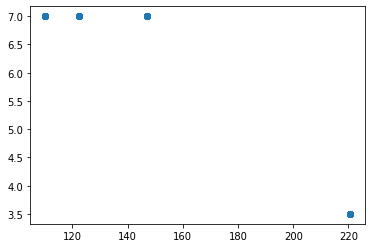

In [94]:
x = data['Roof Area']
y = data['Overall Height']
plt.scatter(x,y)
plt.show

In [95]:
x = data['Roof Area'].values.reshape(-1,1)
y = data['Overall Height'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [96]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-0.03756072]]
[11.87750966]


In [97]:
# accuracy score

lin_reg.score(x_test, y_test)

0.9467612025904983

Text(0.5, 1.0, 'Roof Area vs Overall Height')

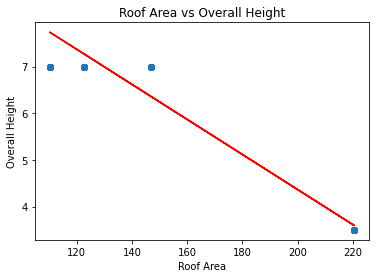

In [98]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Roof Area')
plt.ylabel('Overall Height')
plt.title('Roof Area vs Overall Height')

 **Glazing Area vs Glazing Area Distribution**

<function matplotlib.pyplot.show(close=None, block=None)>

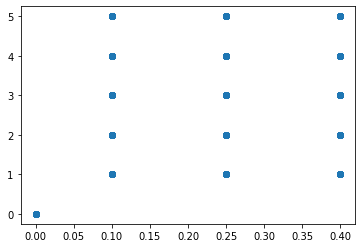

In [99]:
x = data['Glazing Area']
y = data['Glazing Area Distribution']
plt.scatter(x,y)
plt.show

In [100]:
x = data['Glazing Area'].values.reshape(-1,1)
y = data['Glazing Area Distribution'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [101]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[2.54749703]]
[2.19156115]


In [102]:
# accuracy score

lin_reg.score(x_test, y_test)

0.026929097469168606

Text(0.5, 1.0, 'Glazing Area vs Glazing Area Distribution')

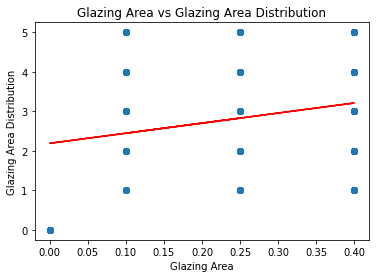

In [103]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Glazing Area')
plt.ylabel('Glazing Area Distribution')
plt.title('Glazing Area vs Glazing Area Distribution')

 **Heating Load vs Roof Area**

<function matplotlib.pyplot.show(close=None, block=None)>

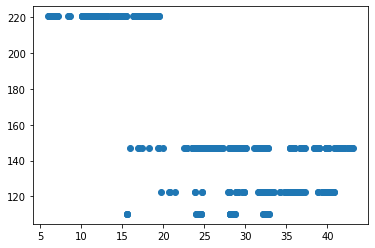

In [104]:
x = data['Heating Load']
y = data['Roof Area']
plt.scatter(x,y)
plt.show

In [105]:
x = data['Heating Load'].values.reshape(-1,1)
y = data['Roof Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [106]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-3.86292706]]
[262.4944464]


In [107]:
# accuracy score

lin_reg.score(x_test, y_test)

0.7888454361806261

Text(0.5, 1.0, 'Heating Load vs Roof Area')

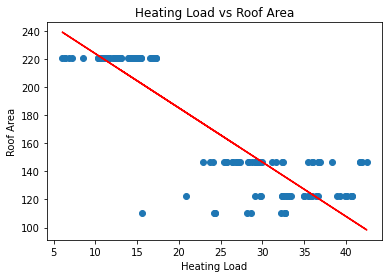

In [108]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Heating Load')
plt.ylabel('Roof Area')
plt.title('Heating Load vs Roof Area')

 **Heating Load vs Overall Height**

<function matplotlib.pyplot.show(close=None, block=None)>

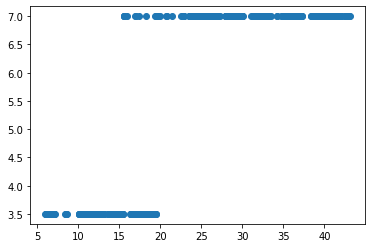

In [109]:
x = data['Heating Load']
y = data['Overall Height']
plt.scatter(x,y)
plt.show

In [110]:
x = data['Heating Load'].values.reshape(-1,1)
y = data['Overall Height'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [111]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.15488491]]
[1.80315611]


In [112]:
# accuracy score

lin_reg.score(x_test, y_test)

0.7796338709039435

Text(0.5, 1.0, 'Heating Load vs Overall Height')

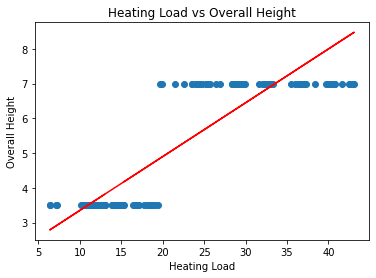

In [113]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Heating Load')
plt.ylabel('Overall Height')
plt.title('Heating Load vs Overall Height')

**Cooling Load vs Roof Area**

<function matplotlib.pyplot.show(close=None, block=None)>

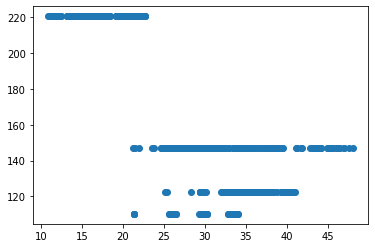

In [114]:
x = data['Cooling Load']
y = data['Roof Area']
plt.scatter(x,y)
plt.show

In [115]:
x = data['Cooling Load'].values.reshape(-1,1)
y = data['Roof Area'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [116]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[-4.11866658]]
[278.37696166]


In [117]:
# accuracy score

lin_reg.score(x_test, y_test)

0.7010636105988739

Text(0.5, 1.0, 'Cooling Load vs Roof Area')

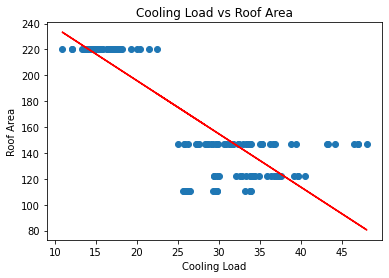

In [118]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Cooling Load')
plt.ylabel('Roof Area')
plt.title('Cooling Load vs Roof Area')

**Cooling Load vs Overall Height**

<function matplotlib.pyplot.show(close=None, block=None)>

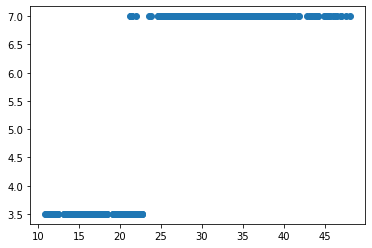

In [119]:
x = data['Cooling Load']
y = data['Overall Height']
plt.scatter(x,y)
plt.show

In [120]:
x = data['Cooling Load'].values.reshape(-1,1)
y = data['Overall Height'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [121]:
# Visualisasi pakai linier regression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# nilai slope/koefisien dan intercept

print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.16486454]]
[1.19301437]


In [122]:
# accuracy score

lin_reg.score(x_test, y_test)

0.8060541511344703

Text(0.5, 1.0, 'Cooling Load vs Overall Height')

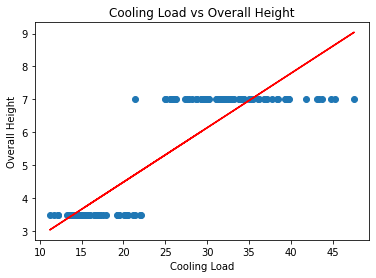

In [123]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c = 'r')
plt.xlabel('Cooling Load')
plt.ylabel('Overall Height')
plt.title('Cooling Load vs Overall Height')

## Data Modelling

In [124]:
X = data[["Relative Compactness", "Surface Area", "Wall Area", "Roof Area" , "Overall Height"]]
Y = data[["Heating Load", "Cooling Load"]]

In [125]:
X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height
0,0.98,514.5,294.0,110.25,7.0
1,0.98,514.5,294.0,110.25,7.0
2,0.98,514.5,294.0,110.25,7.0
3,0.98,514.5,294.0,110.25,7.0
4,0.90,563.5,318.5,122.50,7.0


In [126]:
Y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [127]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = None)

## Standarisasi

In [128]:
standard = StandardScaler()

In [129]:
x_train = standard.fit_transform(X_train)
y_train = standard.fit_transform(Y_train)
x_test = standard.fit_transform(X_test)
y_test = standard.fit_transform(Y_test)

In [130]:
x_train
y_train
x_test
y_test

array([[ 1.01575019,  0.90366204],
       [-0.25959405, -0.28034089],
       [ 0.98769863,  1.03885206],
       [-1.01999176, -1.07621763],
       [ 1.61384957,  2.09202594],
       [-1.40770442, -1.34332695],
       [-0.84867686, -0.91922277],
       [ 0.69916828,  0.42395551],
       [-1.12318143, -1.04023964],
       [ 0.57794545,  1.047574  ],
       [-0.55613914, -0.53327706],
       [ 0.87549238,  1.16422991],
       [-0.84567133, -0.86907163],
       [ 1.95748121,  1.49239278],
       [ 0.20526041,  0.1906437 ],
       [ 0.97667837,  0.86332308],
       [ 0.17420332,  0.12413893],
       [-0.32070638, -0.11462409],
       [-1.08811698, -1.16016628],
       [ 0.39160293,  0.30402888],
       [-0.79557926, -0.83854485],
       [ 0.99370968,  1.20783959],
       [ 0.36555505,  0.74666718],
       [-0.97090152, -1.1089249 ],
       [-0.967896  , -1.1089249 ],
       [ 1.4455402 ,  1.151147  ],
       [-1.04403595, -1.02170553],
       [-0.57116676, -0.43406503],
       [ 0.56191599,

## Model

**Decision Tree**

In [131]:
dt_regressor = DecisionTreeRegressor(random_state = 0)

In [132]:
dt_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [133]:
y_early_dt = dt_regressor.predict(X_train)

In [134]:
r2_score(Y_train, y_early_dt)

0.9171369909736999

In [135]:
y_after_dt = dt_regressor.predict(X_test)

In [136]:
r2_score(Y_test, y_after_dt)

0.9034947334675986

**Random Forest**

In [137]:
# Create random forest model 
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = None)

In [138]:
# Apply the model
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=20)

In [139]:
# Early Predicted value
y_early = rf_regressor.predict(X_train)

In [140]:
r2_score(Y_train, y_early)

0.9170077349503647

In [141]:
y_after = rf_regressor.predict(X_test)

In [142]:
r2_score(Y_test, y_after)

0.9036352924466694

**K-Neirest Neighbors**

In [143]:
# Create KNN Model 
knn = KNeighborsRegressor(n_neighbors=5)

In [144]:
# Apply the model
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [145]:
# Train Predicted Value
y_knn = knn.predict(X_train)

In [146]:
# Train Model Score
r2_score(Y_train, y_knn)

0.9003786570718755

In [147]:
# Test Predicted Value
y_pred_knn = knn.predict(X_test)

In [148]:
# Test Model Score
r2_score(Y_test, y_pred_knn)

0.8879903781401444